# Description: This program classifies images using convolutional neural networks 

Reference: https://medium.com/@randerson112358/classify-images-using-convolutional-neural-networks-python-a89cecc8c679

In [0]:
# !pip install keras

In [2]:
# Load the data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
# Print the data types
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# Get the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [5]:
# Take a look at the first image (at index = 0) in the training data set
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

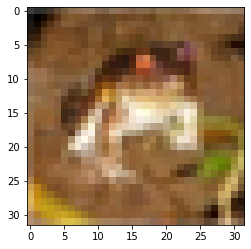

In [6]:
# Show image as picture
import matplotlib.pyplot as plt
img = plt.imshow(X_train[0])

In [7]:
# Print the label of the image
print('The label is:', y_train[0]) # 6 represent is frog

The label is: [6]


In [8]:
# One-Hot Encoding: Convert the labels into a set of 10 numbers to input into neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


# Print the new labels in the training data set
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
# Print an example of the new labels
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# Normalize the pixel in the images to be values between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [0]:
# Build the CNN 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Create the architecture
model = Sequential()

# Convolution Layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

# MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))


# Convolution Layer
model.add(Conv2D(32, (5,5), activation='relu'))

# MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Train the model
hist = model.fit(X_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.7648 - accuracy: 0.3645 - val_loss: 1.5008 - val_accuracy: 0.4507
Epoch 2/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.3918 - accuracy: 0.5034 - val_loss: 1.3932 - val_accuracy: 0.4912
Epoch 3/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.2502 - accuracy: 0.5568 - val_loss: 1.2446 - val_accuracy: 0.5666
Epoch 4/10
35000/35000 [==============================] - 48s 1ms/step - loss: 1.1321 - accuracy: 0.6013 - val_loss: 1.1846 - val_accuracy: 0.5869
Epoch 5/10
35000/35000 [==============================] - 48s 1ms/step - loss: 1.0413 - accuracy: 0.6350 - val_loss: 1.1242 - val_accuracy: 0.6101
Epoch 6/10
35000/35000 [==============================] - 48s 1ms/step - loss: 0.9663 - accuracy: 0.6640 - val_loss: 1.0679 - val_accuracy: 0.6305
Epoch 7/10
35000/35000 [==============================] - 48s 1ms/st

In [14]:
# Get the models accuracy
model.evaluate(X_test, y_test_one_hot)[1]

10000/10000 [==============================] - 4s 410us/step


0.6567999720573425

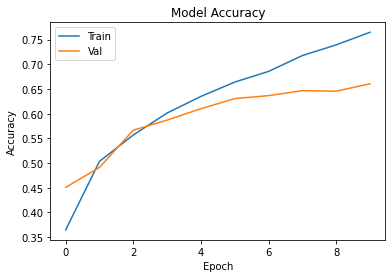

In [15]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

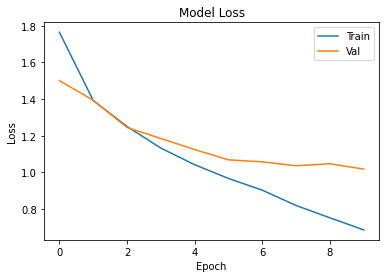

In [16]:
# Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [18]:
# Load the image data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('cat1010.jpg')

Saving cat1010.jpg to cat1010 (1).jpg


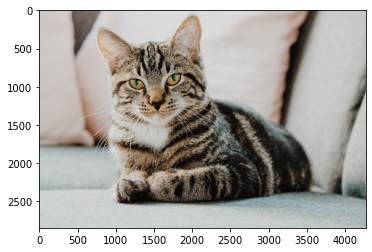

In [19]:
# Show the uploaded image
img = plt.imshow(my_image)


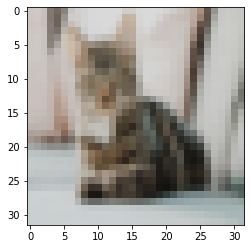

In [20]:
# Resize the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32, 32, 3))

img = plt.imshow(my_image_resized)

In [21]:
# Get the probabilities for each class
import numpy as np
probabilities = model.predict( np.array([my_image_resized, ]))

# Print the Probabilities
probabilities

array([[1.08361582e-03, 1.88428065e-04, 2.10414492e-02, 7.57373750e-01,
        5.07720979e-03, 1.60345197e-01, 5.12436852e-02, 8.08375829e-04,
        1.20891615e-04, 2.71737273e-03]], dtype=float32)

In [22]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0, :])
index
print('Most likely Class:', number_to_class[index[9]], '--probability:', probabilities[0, index[9]])
print('Second Most likely Class:', number_to_class[index[8]], '--probability:', probabilities[0, index[8]])
print('Third Most likely Class:', number_to_class[index[7]], '--probability:', probabilities[0, index[7]])
print('Fourth Most likely Class:', number_to_class[index[6]], '--probability:', probabilities[0, index[6]])
print('Fifth Most likely Class:', number_to_class[index[5]], '--probability:', probabilities[0, index[5]])


Most likely Class: cat --probability: 0.75737375
Second Most likely Class: dog --probability: 0.1603452
Third Most likely Class: frog --probability: 0.051243685
Fourth Most likely Class: bird --probability: 0.02104145
Fifth Most likely Class: deer --probability: 0.00507721


In [0]:
# Save the model
model.save("my_model.h5")

In [0]:
# Load the model
from keras.models import load_model
model = load_model('my_model.h5')